In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [133]:
city_df = pd.read_csv("city_data.csv")
ride_df = pd.read_csv("ride_data.csv")
combo = pd.merge(ride_df, city_df, on="city")
combo.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [184]:

#Basic Calculations
fair_ave = combo.groupby("city")["fare"].mean()
ride_count = combo.groupby("city")["ride_id"].count()
drivers_sum = combo.groupby("city")["driver_count"].count()



In [185]:
CityType = combo.groupby("type")
CityType.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban
1625,Port James,2016-12-04 06:16:36,15.77,2259499336994,15,Suburban
1626,Port James,2016-12-04 06:16:36,15.77,2259499336994,3,Suburban
1627,Port James,2016-05-16 21:25:03,26.26,4051110168629,15,Suburban
1628,Port James,2016-05-16 21:25:03,26.26,4051110168629,3,Suburban
1629,Port James,2016-01-04 22:46:29,20.25,3994763896598,15,Suburban


<function matplotlib.pyplot.show>

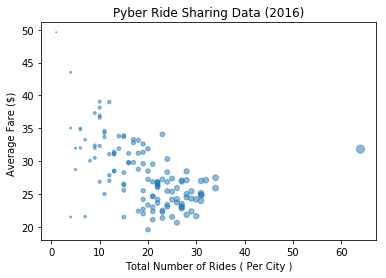

In [186]:
x = ride_count
y = fair_ave
z = drivers_sum
#plt.scatter(x,y, labels = 'Number of Rides', color = 'r')
plt.scatter(x, y, s=drivers_sum, alpha=0.5 )
plt.xlabel('Total Number of Rides ( Per City )')
plt.ylabel('Average Fare ($) ')
plt.title('Pyber Ride Sharing Data (2016)')

plt.show

In [162]:
fair_total = CityType["fare"].sum()

# Calculate the Percentage by city type
city_type_totals = combo["type"].value_counts()
city_type_percents = city_type_totals / fair_total * 100
city_type_demographics = pd.DataFrame({"Total Count": city_type_totals, "% per city": city_type_percents})




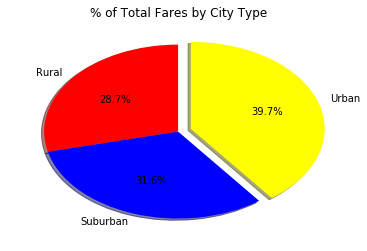

In [161]:
#Creating a pie
fig1, ax1 = plt.subplots()
colors = [ 'red', 'blue', 'yellow']
explode = (0, 0, 0.1 ) 
ax1.pie(city_type_percents, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90, colors=colors)
plt.title('% of Total Fares by City Type')
labels = [ "Rural", "Suburban", "Urban" ]

In [179]:
# % of Rides by city Types
TotalRide = len(combo["ride_id"])
ride_totals = combo["type"].value_counts()
ride_percents = ride_totals / TotalRide * 100
Ride_demographics = pd.DataFrame({"Total Count": ride_totals, "Percentage by Types": ride_percents})


Text(0.5,1,'% of Total Rides by City Type')

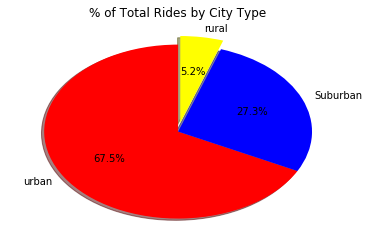

In [180]:
#Creating a pie
fig1, ax1 = plt.subplots()
colors = [ 'red', 'blue', 'yellow']
explode = (0, 0, 0.1 ) 
labels = [ "urban", "Suburban", "rural" ]
ax1.pie(ride_percents, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90, colors=colors)
plt.title('% of Total Rides by City Type')

In [188]:
Driver_totals = combo.groupby('type')['driver_count'].sum()
Driver_totals

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [190]:
# % of Total Drivers by City Types
TotalDrivers = combo["driver_count"].sum()
driver_totals = combo.groupby('type')['driver_count'].sum()
driver_percents = driver_totals / TotalDrivers * 100
driver_demographics = pd.DataFrame({"Total Count": driver_totals, "Percentage by Types": driver_percents})


Text(0.5,1,'% of Total Rides by City Type')

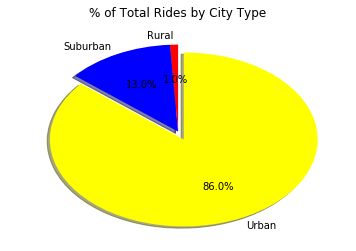

In [194]:
#Creating a pie
fig1, ax1 = plt.subplots()
colors = [ 'red', 'blue', 'yellow']
explode = (0, 0, 0.1 ) 
labels = [ "Rural", "Suburban", "Urban" ]
ax1.pie(driver_percents, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90, colors=colors)
plt.title('% of Total Rides by City Type')

In [ ]:
Pyber Ride Sharing

Analysis

Observable Trend 1: Urban cities have the most drivers and rides
Observable Trend 2: Rural cities have the least drivers and rides
Observable Trend 3:Davidtown and South Bryanstad ( both Urban cities ) have the most drivers